<a href="https://colab.research.google.com/github/GGMmattos/Machine-Learning-And-Data-Science/blob/main/Reconhecimento_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento


In [20]:
from PIL import Image
import numpy as np
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
path = '/content/drive/MyDrive/Colab Notebooks/Curso de Py MACHINE LEANING/Materiais/Bases de dados/yalefaces.zip'
zip_object  = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

Gerando matriz com os dados das faces e os IDS das pessoas.

In [4]:
def dados_imagem():
  caminhos = [os.path.join('/content/drive/MyDrive/Colab Notebooks/Curso de Py MACHINE LEANING/Materiais/Bases de dados/yalefaces/train', f) for f in os.listdir('/content/drive/MyDrive/Colab Notebooks/Curso de Py MACHINE LEANING/Materiais/Bases de dados/yalefaces/train')]
  faces = []
  ids = []
  for caminho in caminhos:
    imagem = Image.open(caminho).convert('L') #L = Escala de cinza (2 canais) | P = RGB (3 canais)
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', '')) #busca dos IDs
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces


In [5]:
ids, faces = dados_imagem()

In [6]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('cassificadorLBPH.yml')

# Classificação

In [28]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/drive/MyDrive/Colab Notebooks/Curso de Py MACHINE LEANING/Materiais/Bases de dados/yalefaces/Modelo/cassificadorLBPH.yml')

In [29]:
imagem_teste = '/content/drive/MyDrive/Colab Notebooks/Curso de Py MACHINE LEANING/Materiais/Bases de dados/yalefaces/test/subject03.glasses.gif'

In [30]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [ 68  68  68 ...  68  68  68]]


In [31]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

3

In [32]:
id_correto  =  int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
id_correto

3

In [33]:
from google.colab.patches import cv2_imshow


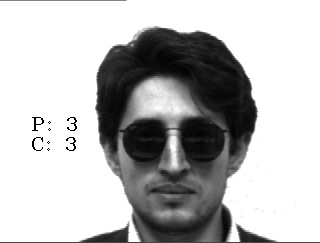

In [34]:
x = 30
y = 100
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'C: ' + str(id_correto), (x,y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)
